В нашем распоряжении данные о некоторых пользователях из нескольких городов, а также об их поездках. Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться без подписки и с подпиской Ultra. Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

Нам необходимо проанализировать данные и провереть некоторые гипотезы, которые могут помочь бизнесу вырасти:

1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.
2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Поверить гипотезу, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 
3130
3 Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Для совершения необходимого анализа мое исследование будет проходить в 6 этапов:
в начале буду загружать данные из предоставленных таблиц, анализировать и обработать информацию по полученным таблицам, подготовлю и проанализирую полученные данные, объеденю информацию из трех таблив в одну, а затем рассортирую ее на две на основании двух статистически важных групп пользователей. В дальнейшем подсчитаю выручку для двух групп пользователеф и проверю поставленные передо мной гипотезы.

In [1]:
import pandas as pd

#### Шаг 1. Загрузка данных

In [2]:
users = pd.read_csv('/datasets/users_go.csv', sep = ',')

In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [4]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [5]:
rides = pd.read_csv('/datasets/rides_go.csv', sep = ',')

In [6]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [8]:
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv', sep = ',')

In [9]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [10]:
subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


На данном этапе были открыты и изучены три разные таблицы, необходимые для дальнейшей работы.

#### Шаг 2. Предобработка данных

In [11]:
rides['date'] = pd.to_datetime(rides['date'],format='%Y-%m-%d %H:%M')
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [12]:
rides['month'] = rides['date'].dt.month
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [13]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [14]:
rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [15]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [16]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [17]:
users['name'].unique()

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

In [18]:
users['name'] = (
    users['name']
        .str.replace('ё','е')
        .replace('Влад','Владислав')
)

In [19]:
users.duplicated().sum()

31

In [20]:
users = users.drop_duplicates().reset_index(drop=True)

In [21]:
rides.duplicated().sum()

0

In [22]:
subscriptions.duplicated().sum()

0

Таблицы были изучены на аномалии и пропущенные значения. В ходе данной работы не было найдено пропущенных значений, дубликаты в именах были заменены, дата была приведена в соответсвующему формату и был добавлен столбец с месяцем в виде порядкого числа.

#### Шаг 3. Исследовательский анализ данных

In [23]:
import matplotlib.pyplot as plt

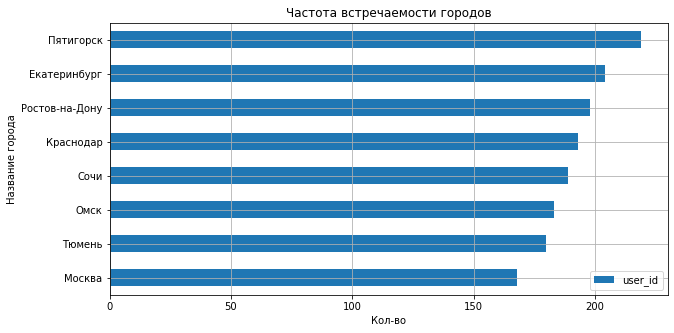

In [24]:
(
    users.pivot_table(index='city', values='user_id', aggfunc = 'count')
    .sort_values('user_id')
    .plot(grid=True, kind='barh', figsize=(10, 5))
)
  
plt.title('Частота встречаемости городов')
plt.ylabel('Название города')
plt.xlabel('Кол-во')
plt.show()


In [25]:
users['city'].describe()

count          1534
unique            8
top       Пятигорск
freq            219
Name: city, dtype: object

Из нашего графика видно, что больше всего пользователей находится в городе Пятигорске, а меньшее количество - в Москве.

In [26]:
subscriptions_count = users.groupby(by='subscription_type').count()
subscriptions_count

,user_id,name,age,city
subscription_type,,,,
free,835,835,835,835
ultra,699,699,699,699


<AxesSubplot:ylabel='Соотношение пользователей с подпиской и без'>

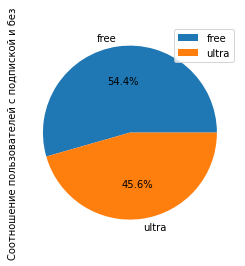

In [27]:
subscriptions_count.plot(y='name', autopct='%1.1f%%',label='Соотношение пользователей с подпиской и без', kind='pie', figsize=(4,4))

In [28]:
subscriptions_count.describe()

,user_id,name,age,city
count,2.000000,2.000000,2.000000,2.000000
mean,767.000000,767.000000,767.000000,767.000000
std,96.166522,96.166522,96.166522,96.166522
min,699.000000,699.000000,699.000000,699.000000
25%,733.000000,733.000000,733.000000,733.000000
50%,767.000000,767.000000,767.000000,767.000000
75%,801.000000,801.000000,801.000000,801.000000
max,835.000000,835.000000,835.000000,835.000000


Из диаграммы видно, что практически одинаковую долю занимают пользователи с подпиской и без. На 8.8% пользователей без подписки больше, чем с подпиской.

Text(0.5, 0, 'Возраст')

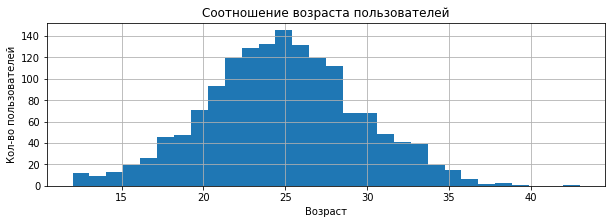

In [29]:
users['age'].hist(bins=30, figsize=(10,3))
  
plt.title('Соотношение возраста пользователей')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Возраст')

In [30]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Из нашей гистограммы видно, что большая часть пользователей находится в возрасте от 20 до 30. Среднее значение:25.Минимальный зарегистрированний возраст:12, максимальный - 43.

Text(0.5, 0, 'Расстояние')

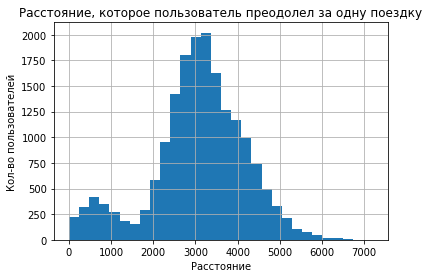

In [31]:
rides['distance'].hist(bins=30)

  
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Расстояние')

In [32]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Среднее расстояние: 3070м, минимальное - 0.85, максимальное - 7211. Из диаграммы видно аномальный скачок вначале.

Text(0.5, 0, 'Время')

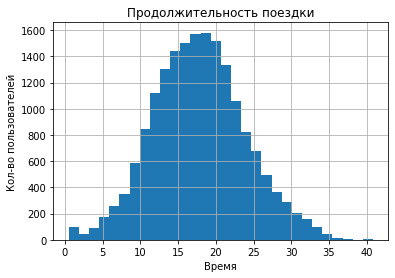

In [33]:
rides['duration'].hist(bins=30)
  
plt.title('Продолжительность поездки')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Время')

In [34]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Среднее время поездки оказалось равно 17 мин. Минимальное - 0.5, максимальное - 40.

В ходе исследовательского анализа данных стало ясно, что самый частовстречающийся город: Пятигорск, противоположный - Москва. На 127 человек больше без подписок, чем с подписками, разница оказалась небольшой. Возраст большинства пользователей от 20 до 30 лет.Большая часть людей предодалевает в среднем расстояние в 3000 за олну поездку, а по времени поездка занимает в среднем 15-20 мин.

#### Шаг 4. Объединение данных

In [35]:
import numpy as np

rides['duration'] = np.ceil(rides['duration']) 

In [36]:
merge_users = users.merge(rides, on='user_id',how='left')
merge_users.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8
5,1,Кира,22,Тюмень,ultra,2770.890808,17.0,2021-10-09,10
6,1,Кира,22,Тюмень,ultra,3039.020292,15.0,2021-10-19,10
7,1,Кира,22,Тюмень,ultra,2842.118050,24.0,2021-11-06,11
8,1,Кира,22,Тюмень,ultra,3412.690668,16.0,2021-11-14,11
9,1,Кира,22,Тюмень,ultra,748.690645,16.0,2021-11-22,11


In [37]:
users.shape

(1534, 5)

In [38]:
rides.shape

(18068, 5)

In [39]:
merge_users.shape

(18068, 9)

В ходе проведенной проверки размерности таблиц до и после объединения, мы выяснили, что размерность совпала по количеству строк.

In [40]:
merge_users.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8


In [41]:
subscription_free = merge_users.query('subscription_type == "free"')
subscription_ultra = merge_users.query('subscription_type == "ultra"')

In [42]:
subscription_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month
6500,700,Айдар,22,Омск,free,2515.690719,15.0,2021-01-02,1
6501,700,Айдар,22,Омск,free,846.932642,17.0,2021-02-01,2
6502,700,Айдар,22,Омск,free,4004.434142,21.0,2021-02-04,2
6503,700,Айдар,22,Омск,free,1205.911290,10.0,2021-02-10,2
6504,700,Айдар,22,Омск,free,3047.379435,18.0,2021-02-14,2


In [43]:
subscription_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8


Text(0.5, 0, 'Расстояние')

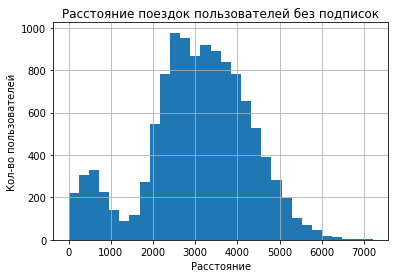

In [44]:
subscription_free['distance'].hist(bins=30)

plt.title('Расстояние поездок пользователей без подписок')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Расстояние')

В ходе анализа пользователей с подпиской и без видно, что пользователи без подписки преодалевают хорошее расстояние, в среднем 2000-4500м, что ничем не уступает категории пользователей с подпиской. Есть на графике анамальный скачок вначале, по всей вероятности пользователи пробуют и сразу же заканчивают.

Text(0.5, 0, 'Время')

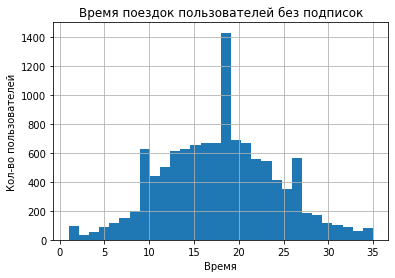

In [45]:
subscription_free['duration'].hist(bins=30)

plt.title('Время поездок пользователей без подписок')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Время')

Среднее время, которое пользователи без подписки затрачивают на одну поездку, 10-25 мин.

Text(0.5, 0, 'Расстояние')

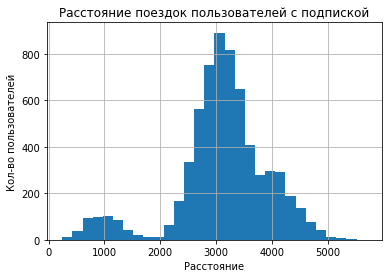

In [46]:
subscription_ultra['distance'].hist(bins=30)

plt.title('Расстояние поездок пользователей с подпиской')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Расстояние')

Среднее расстояние пользователей с подпиской 2500-3500, максимальное расстоние меньше, чем пользователей без подписки.

Text(0.5, 0, 'Время')

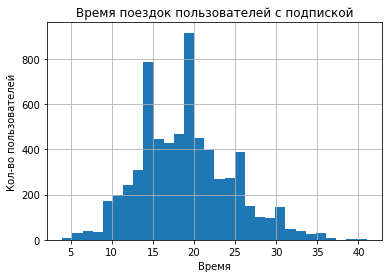

In [47]:
subscription_ultra['duration'].hist(bins=30)

plt.title('Время поездок пользователей с подпиской')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Время')

Среднее время категории с подпиской находится в том же числовом диапазоне, что и у категории пользователей без подписки.

#### Шаг 5. Подсчёт выручки

In [48]:
merge_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 1.4+ MB


In [49]:
subscription_free.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 903.8+ KB


In [50]:
subscription_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6500 entries, 0 to 6499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6500 non-null   int64         
 1   name               6500 non-null   object        
 2   age                6500 non-null   int64         
 3   city               6500 non-null   object        
 4   subscription_type  6500 non-null   object        
 5   distance           6500 non-null   float64       
 6   duration           6500 non-null   float64       
 7   date               6500 non-null   datetime64[ns]
 8   month              6500 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 507.8+ KB


In [51]:
subscription_free_gain = subscription_free.pivot_table(index =['user_id','month','subscription_type'], values =['duration','distance'], aggfunc=('sum','count'))
subscription_free_gain.columns = ['distance_count','distance_sum','duration_count','duration_sum']
subscription_free_gain

distance_count  distance_sum  duration_count  \
user_id month subscription_type                                                 
700     1     free                            1   2515.690719               1   
        2     free                            5  13446.659764               5   
        3     free                            1   3798.334905               1   
        4     free                            1   2984.551206               1   
        6     free                            2   5927.650988               2   
...                                         ...           ...             ...   
1534    6     free                            2   3409.468534               2   
        8     free                            2   7622.453034               2   
        9     free                            1   4928.173852               1   
        11    free                            4  13350.015305               4   
        12    free                            1   2371.711192               1   

                                 duration_sum  
user_id month subscription_type                
700     1     free                       15.0  
        2     free                       89.0  
        3     free                       19.0  
        4     free                       16.0  
        6     free                       29.0  
...                                       ...  
1534    6     free                       26.0  
        8     free                       48.0  
        9     free                       23.0  
        11    free                       78.0  
        12    free                       16.0  

[6798 rows x 4 columns]

In [52]:
subscription_ultra_gain = subscription_ultra.pivot_table(index =['user_id','month','subscription_type'], values =['duration','distance'], aggfunc=('sum','count'))
subscription_ultra_gain.columns = ['distance_count','distance_sum','duration_count','duration_sum']
subscription_ultra_gain

distance_count  distance_sum  duration_count  \
user_id month subscription_type                                                 
1       1     ultra                           2   7027.511294               2   
        4     ultra                           1    754.159807               1   
        8     ultra                           2   6723.470560               2   
        10    ultra                           2   5809.911100               2   
        11    ultra                           3   7003.499363               3   
...                                         ...           ...             ...   
699     6     ultra                           1   4072.797406               1   
        8     ultra                           2   7018.324143               2   
        9     ultra                           2   6364.861911               2   
        10    ultra                           1   4707.845501               1   
        12    ultra                           1   3202.890770               1   

                                 duration_sum  
user_id month subscription_type                
1       1     ultra                      42.0  
        4     ultra                       7.0  
        8     ultra                      46.0  
        10    ultra                      32.0  
        11    ultra                      56.0  
...                                       ...  
699     6     ultra                      17.0  
        8     ultra                      45.0  
        9     ultra                      31.0  
        10    ultra                      16.0  
        12    ultra                      26.0  

[4533 rows x 4 columns]

In [53]:
subscription_free_gain['gain']= 50*subscription_free_gain['duration_count']+8*subscription_free_gain['duration_sum']+0

subscription_ultra_gain['gain']= 0*subscription_ultra_gain['duration_count']+6*subscription_ultra_gain['duration_sum']+199

In [54]:
subscription_free_gain

distance_count  distance_sum  duration_count  \
user_id month subscription_type                                                 
700     1     free                            1   2515.690719               1   
        2     free                            5  13446.659764               5   
        3     free                            1   3798.334905               1   
        4     free                            1   2984.551206               1   
        6     free                            2   5927.650988               2   
...                                         ...           ...             ...   
1534    6     free                            2   3409.468534               2   
        8     free                            2   7622.453034               2   
        9     free                            1   4928.173852               1   
        11    free                            4  13350.015305               4   
        12    free                            1   2371.711192               1   

                                 duration_sum   gain  
user_id month subscription_type                       
700     1     free                       15.0  170.0  
        2     free                       89.0  962.0  
        3     free                       19.0  202.0  
        4     free                       16.0  178.0  
        6     free                       29.0  332.0  
...                                       ...    ...  
1534    6     free                       26.0  308.0  
        8     free                       48.0  484.0  
        9     free                       23.0  234.0  
        11    free                       78.0  824.0  
        12    free                       16.0  178.0  

[6798 rows x 5 columns]

In [55]:
subscription_ultra_gain

distance_count  distance_sum  duration_count  \
user_id month subscription_type                                                 
1       1     ultra                           2   7027.511294               2   
        4     ultra                           1    754.159807               1   
        8     ultra                           2   6723.470560               2   
        10    ultra                           2   5809.911100               2   
        11    ultra                           3   7003.499363               3   
...                                         ...           ...             ...   
699     6     ultra                           1   4072.797406               1   
        8     ultra                           2   7018.324143               2   
        9     ultra                           2   6364.861911               2   
        10    ultra                           1   4707.845501               1   
        12    ultra                           1   3202.890770               1   

                                 duration_sum   gain  
user_id month subscription_type                       
1       1     ultra                      42.0  451.0  
        4     ultra                       7.0  241.0  
        8     ultra                      46.0  475.0  
        10    ultra                      32.0  391.0  
        11    ultra                      56.0  535.0  
...                                       ...    ...  
699     6     ultra                      17.0  301.0  
        8     ultra                      45.0  469.0  
        9     ultra                      31.0  385.0  
        10    ultra                      16.0  295.0  
        12    ultra                      26.0  355.0  

[4533 rows x 5 columns]

На данноим этапе работы была подсчитана выручка для двух категорий пользователей(с подской и без), также данные были объединены в сводные таблицы по месяцам и по пользователю.

#### Шаг 6. Проверка гипотез

Ho: группы пользователей с подпиской и без демонстрируют длительность
Н1: обе эти группы демонстрируют разную длительность.

In [59]:
from scipy import stats as st
import numpy as np

alpha = 0.05

results1 = st.ttest_ind(subscription_ultra['duration'], subscription_free['duration'],alternative='greater')

print('p-значение:', results1.pvalue)

if (results1.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.4959453720736625e-34
Отвергаем нулевую гипотезу


Нулевую гипртезу  получилось отвергнуть, есть основание пологать, что люди с подпиской  ездят больше, чем люди без подписки

Ho: расстояние одной поездки 3130м
Н1: расстояние одной поездки меньше 3130м

In [57]:
interested_value = 3130

alpha = 0.05

results2 = st.ttest_1samp(subscription_ultra['distance'],interested_value, alternative='less')
print('p-значение:', results2.pvalue)

if results2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


p-значение: 0.08046311521502146
Не получилось отвергнуть нулевую гипотезу


Мы хотели узнать не превыщает ли дистанция 3130 м,  pvalue оказалось ,близка от значения alpha, значит проезжают за одну поездку чуть больше, чем 3130м. 

Ho: помесячная выручка с подпиской
Н1: помесячная выручка без подписки меньше

In [58]:
alpha = 0.05

results3 = st.ttest_ind(subscription_ultra_gain['gain'], subscription_free_gain['gain'], alternative='greater')

print('p-значение:', results3.pvalue)

if results3.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Нулевую гипртезу  получилось отвергнуть, есть основание пологать, что люди с подпиской тратят больше, чем люди без подписки

На основании проведенных исследований стоит полагать, что в данном случае подписка не несет существенного прироста выручки, люди без подписки тратят больше.

#### Шаг 7. Распределения

В ходе данного ислледования, которое проводилось на основании 1534 пользователей, которые преобладают из города Пятигорска, был сделан вывод, что подписка не сильно влияет на доходность данного предприятия. Пользователи без подписки проезжат больше и дольше, чем категория пользователей с подпиской. Людей с подпиской действительно меньше, количество которых продакт-менеджеры хотят увеличить. Необходимые гипотезы не подтвердились.